# **Data Cleaning:**
Summarize what we did in Excel, and some stuff moving into python
- dawg i had to manually remove values because 1). the list is so small, 2). not that hard as a result 3). excel/python would take more time
- deleted non 2021-2022 columns 
- In excel, for athabasca, bruderheim,etc. used excel to isolate just unit types, then finished cleaning in pandas

In [2]:
# further data cleaning in pandas
import pandas as pd
pd.options.mode.chained_assignment = None 

# read datasets
table6 = pd.read_csv("Matthew's Data/Table6.csv")
table8 = pd.read_csv("Matthew's Data/Table8.csv")
table9 = pd.read_csv("Matthew's Data/table9.csv")

# create list of all strings that contain the names of communities in table 8
community_names = table8["Community"].unique().tolist()

# filter the csv based on if it exists in the observed commmunities
table9_byAreaNames = table9[table9["Area Name"].isin(community_names)]

# IMPUTATION WARNING: the only value  
table9_byAreaNames.loc[table9_byAreaNames["Area Name"] == "Grande Cache"] = table9_byAreaNames.loc[table9_byAreaNames["Area Name"] == "Grande Cache"].replace("--", "3276")

# convert 2022 and 2021 column to integer values (since it is currently being read as string)
table9_byAreaNames["2022"] = table9_byAreaNames["2022"].apply(lambda x: int(x))
table9_byAreaNames.drop(["2021"],axis=1,inplace=True)

# display populations (alphabetical order)
table9_cleaned = table9_byAreaNames.sort_values("Area Name")
table9_cleaned
        

,Area Name,Type,2022
308,Athabasca,T,2827
330,Banff,T,9347
296,Barrhead,T,4503
26,Bassano,T,1255
409,Beaverlodge,T,2371
...,...,...,...
183,Vegreville,T,5819
190,Vermilion,T,3978
59,Vulcan,T,1825
131,Wainwright,T,6741


For this data set, it was at some point much easier to clean manually than it was to use excel or python, due to the fact that in this check, less than 15 were absent due to some error, and was as a result, so using ctrl + f and manually editing was not (in general, it isn't a practical solution but here is somehow less time consuming than using python/excel)

New changes
- removed commas in thousands from Table 8 --> can read as numerical values now
- removed "Overall Vacancy Rates" from Table 8, since this is covered in table 6 and is more accurate there, just need the weighted rents between years in table 8\
- added "population" which we want to analyze how town population sizes might also be related to costs and shit
    - add to faceted graph as an outer variable

In [3]:
# remove table8 zeroes (since this is false data)
table8 = table8[table8["2021 Weighted Rent"] != 0]
table8 = table8[table8["2022 Weighted Rent"] != 0]

table8

,Community,Unit Type,2021 Weighted Rent,2022 Weighted Rent
0,Athabasca,1 - Bedroom,840,852
1,Athabasca,2 - Bedroom,912,931
2,Athabasca,3 - Bedroom,1026,980
3,Athabasca,Bachelor,706,719
4,Banff,1 - Bedroom,1318,1435
...,...,...,...,...
247,Wainwright,Bachelor,450,434
248,Westlock,1 - Bedroom,775,768
249,Westlock,2 - Bedroom,881,881
250,Westlock,3 - Bedroom,972,963


For each of the individual community summaries:
- Did a bit of cleaning in Excel to reformat and just get number/percent by unit type
- Rest of cleaning done in pandas

In [4]:
bruderheim_vacancies = pd.read_csv("Matthew's Data/Summaries/Bruderheim Summary.csv")
bruderheim_vacancies.set_index("Number and Percentage of Vacancies by Type of Unit", inplace=True)
bruderheim_vacancies = bruderheim_vacancies.dropna(how='all',axis=1)
bruderheim_vacancies = bruderheim_vacancies.dropna(how='all',axis=0)
bruderheim_vacancies.loc["Percentage"] = bruderheim_vacancies.loc["Percentage"].apply(lambda x: x*100)
bruderheim_vacancies

,Bachelor,1 - Bedroom,2 - Bedroom,3 - Bedroom,4+ Bedroom
Number and Percentage of Vacancies by Type of Unit,,,,,
Number of Units,4.0,36.0,36.0,4.0,0.0
Vacancies,2.0,19.0,12.0,3.0,0.0
Percentage,50.0,52.8,33.3,75.0,0.0


In [5]:
foxcreek_vacancies = pd.read_csv("Matthew's Data/Summaries/Fox Creek Summary.csv")
foxcreek_vacancies.set_index("Number and Percentage of Vacancies by Type of Unit", inplace=True)
foxcreek_vacancies.loc["Percentage"] = foxcreek_vacancies.loc["Percentage"].apply(lambda x: x*100)
foxcreek_vacancies

,Bachelor,1 - Bedroom,2 - Bedroom,3 - Bedroom,4+ Bedroom
Number and Percentage of Vacancies by Type of Unit,,,,,
Number of Units,1.0,36.0,55.0,5.0,0.0
Vacancies,0.0,21.0,35.0,0.0,0.0
Percentage,0.0,58.3,63.6,0.0,0.0


In [6]:
falher_vacancies = pd.read_csv("Matthew's Data/Summaries/Falher Summary.csv")
falher_vacancies.set_index("Number and Percentage of Vacancies by Type of Unit", inplace=True)
falher_vacancies = falher_vacancies.dropna(how='all',axis=1)
falher_vacancies = falher_vacancies.dropna(how='all',axis=0)
falher_vacancies.loc["Percentage"] = falher_vacancies.loc["Percentage"].apply(lambda x: x*100)
falher_vacancies

,Bachelor,1 - Bedroom,2 - Bedroom,3 - Bedroom,4+ Bedroom
Number and Percentage of Vacancies by Type of Unit,,,,,
Number of Units,2.0,20.0,24.0,7.0,0.0
Vacancies,0.0,3.0,2.0,1.0,0.0
Percentage,0.0,15.0,8.3,14.3,0.0


In [7]:
highprairie_vacancies = pd.read_csv("Matthew's Data/Summaries/High Prairie Summary.csv")
highprairie_vacancies.set_index("Number and Percentage of Vacancies by Type of Unit", inplace=True)
highprairie_vacancies.loc["Percentage"] = highprairie_vacancies.loc["Percentage"].apply(lambda x: x*100)
highprairie_vacancies

,Bachelor,1 - Bedroom,2 - Bedroom,3 - Bedroom,4+ Bedroom
Number and Percentage of Vacancies by Type of Unit,,,,,
Number of Units,11.0,97.0,36.0,13.0,0.0
Vacancies,2.0,9.0,6.0,0.0,0.0
Percentage,18.2,9.3,16.7,0.0,0.0


In [8]:
tofield_vacancies = pd.read_csv("Matthew's Data/Summaries/Tofield Summary.csv")
tofield_vacancies.set_index("Number and Percentage of Vacancies by Type of Unit", inplace=True)
tofield_vacancies = tofield_vacancies.dropna(how='all',axis=1)
tofield_vacancies = tofield_vacancies.dropna(how='all',axis=0)
tofield_vacancies.loc["Percentage"] = tofield_vacancies.loc["Percentage"].apply(lambda x: x*100)
tofield_vacancies

,Bachelor,1 - Bedroom,2 - Bedroom,3 - Bedroom,4+ Bedroom
Number and Percentage of Vacancies by Type of Unit,,,,,
Number of Units,1,4,13,7,0
Vacancies,0,0,0,0,0
Percentage,0,0,0,0,0


In [27]:
millet_vacancies = pd.read_csv("Matthew's Data/Summaries/Millet Summary.csv")
millet_vacancies.set_index("Number and Percentage of Vacancies by Type of Unit", inplace=True)
millet_vacancies = millet_vacancies.dropna(how='all',axis=1)
millet_vacancies = millet_vacancies.dropna(how='all',axis=0)
millet_vacancies.loc["Percentage"] = millet_vacancies.loc["Percentage"].apply(lambda x: x*100)
millet_vacancies

,Bachelor,1 - Bedroom,2 - Bedroom,3 - Bedroom,4+ Bedroom
Number and Percentage of Vacancies by Type of Unit,,,,,
Number of Units,0.0,5.0,14.0,0.0,0.0
Vacancies,0.0,0.0,0.0,0.0,0.0
Percentage,0.0,0.0,0.0,0.0,0.0


In [28]:
mclennan_vacancies = pd.read_csv("Matthew's Data/Summaries/Mclennan Summary.csv")
mclennan_vacancies.set_index("Number and Percentage of Vacancies by Type of Unit", inplace=True)
mclennan_vacancies = mclennan_vacancies.dropna(how='all',axis=1)
mclennan_vacancies = mclennan_vacancies.dropna(how='all',axis=0)
mclennan_vacancies.loc["Percentage"] = mclennan_vacancies.loc["Percentage"].apply(lambda x: x*100)
mclennan_vacancies

,Bachelor,1 - Bedroom,2 - Bedroom,3 - Bedroom,4+ Bedroom
Number and Percentage of Vacancies by Type of Unit,,,,,
Number of Units,0.0,12.0,12.0,0.0,0.0
Vacancies,0.0,1.0,0.0,0.0,0.0
Percentage,0.0,8.3,0.0,0.0,0.0


-------

# **Visualizations + Analysis:**

Potential Conclusions from these visuals:
- This one is pretty much just number of vacancies relative to the number of units over rental ranges
- Overall, for the most part pretty much mostly, the vacancies tend to be proportional to the number of units in that range

In [9]:
# TASKS FOR FRIDAY:
# TODO plot all of the sampled small towns --> bar graph as well as line graph
# TODO pick 4-5 medium towns and do the same
# TODO pick 4-5 big towns (one of which should include Slave Lake) and do the same

In [10]:
import matplotlib.pyplot as plt
import numpy as np

In [11]:
# get mean rent by each unit type for both 2021 and 2022
mean_bachelors2022 = table8[table8["Unit Type"] == "Bachelor"]["2022 Weighted Rent"].mean()
mean_1beds2022 = table8[table8["Unit Type"] == "1 - Bedroom"]["2022 Weighted Rent"].mean()
mean_2beds2022 = table8[table8["Unit Type"] == "2 - Bedroom"]["2022 Weighted Rent"].mean()
mean_3beds2022 = table8[table8["Unit Type"] == "3 - Bedroom"]["2022 Weighted Rent"].mean()
mean_4beds2022 = table8[table8["Unit Type"] == "4+ Bedroom"]["2022 Weighted Rent"].mean()

mean_bachelors2021 = table8[table8["Unit Type"] == "Bachelor"]["2021 Weighted Rent"].mean()
mean_1beds2021 = table8[table8["Unit Type"] == "1 - Bedroom"]["2021 Weighted Rent"].mean()
mean_2beds2021 = table8[table8["Unit Type"] == "2 - Bedroom"]["2021 Weighted Rent"].mean()
mean_3beds2021 = table8[table8["Unit Type"] == "3 - Bedroom"]["2021 Weighted Rent"].mean()
mean_4beds2021 = table8[table8["Unit Type"] == "4+ Bedroom"]["2021 Weighted Rent"].mean()

print("2021 Mean Bachelor Rents:",mean_bachelors2021)
print("2021 Mean 1 - Bedroom Rents:",mean_1beds2021)
print("2021 Mean 2 - Bedroom Rents:",mean_2beds2021)
print("2021 Mean 3 - Bedroom Rents:",mean_3beds2021)
print("2021 Mean 4+ Bedroom Rents:",mean_4beds2021)

print()

print("2022 Mean Bachelor Rents:",mean_bachelors2022)
print("2022 Mean 1 - Bedroom Rents:",mean_1beds2022)
print("2022 Mean 2 - Bedroom Rents:",mean_2beds2022)
print("2022 Mean 3 - Bedroom Rents:",mean_3beds2022)
print("2022 Mean 4+ Bedroom Rents:",mean_4beds2022)

2021 Mean Bachelor Rents: 688.741935483871
2021 Mean 1 - Bedroom Rents: 779.925925925926
2021 Mean 2 - Bedroom Rents: 900.6101694915254
2021 Mean 3 - Bedroom Rents: 1036.625
2021 Mean 4+ Bedroom Rents: 1625.0

2022 Mean Bachelor Rents: 702.741935483871
2022 Mean 1 - Bedroom Rents: 826.0
2022 Mean 2 - Bedroom Rents: 943.1186440677966
2022 Mean 3 - Bedroom Rents: 1064.6041666666667
2022 Mean 4+ Bedroom Rents: 1708.6


In [12]:
# Divide population into different sizes
population_labels, population_bins = pd.qcut(table9_cleaned["2022"], 3, retbins=True) # 
print("Bin Divisions:",population_bins.astype(int))

Bin Divisions: [  719  2492  5760 14996]


This means we are going to divide the population as:
- Small: [719, 2492]
- Medium: (2492, 5760]
- Large: (5760, 14996]

*([] = Included, () = Excluded)*

In [13]:
# list of "small" towns (size 719-2492)
small_towns = table9_cleaned[table9_cleaned["2022"].between(population_bins[0], population_bins[1])]
small_towns

# TODO filter again but just for the towns we are looking at

,Area Name,Type,2022
26,Bassano,T,1255
409,Beaverlodge,T,2371
4,Bow Island,T,2129
137,Bowden,T,1297
202,Bruderheim,T,1392
145,Eckville,T,1079
260,Elk Point,T,1455
417,Falher,T,1034
401,Fox Creek,T,1841
48,Hanna,T,2492


In [14]:
# Sampled Small Towns: Bruderheim, Fox Creek, Falher, High Prairie, Tofield, Millet, Mclennan
smalltowns = ["Bruderheim", "Fox Creek", "Falher", "High Prairie", "Tofield", "Millet", "Mclennan"]
costs_smalltowns = table8[table8["Community"].isin(smalltowns)]
vacancy_smalltowns = table6[table6["Community"].isin(smalltowns)]

bruderheim = costs_smalltowns[costs_smalltowns["Community"] == "Bruderheim"]
foxcreek = costs_smalltowns[costs_smalltowns["Community"] == "Fox Creek"]
falher = costs_smalltowns[costs_smalltowns["Community"] == "Falher"]
highprairie = costs_smalltowns[costs_smalltowns["Community"] == "High Prairie"]
tofield = costs_smalltowns[costs_smalltowns["Community"] == "Tofield"]
millet = costs_smalltowns[costs_smalltowns["Community"] == "Millet"]
mclennan = costs_smalltowns[costs_smalltowns["Community"] == "Mclennan"]

bruderheim_rents = bruderheim[["2021 Weighted Rent", "2022 Weighted Rent"]]
foxcreek_rents = foxcreek[["2021 Weighted Rent", "2022 Weighted Rent"]]
falher_rents = falher[["2021 Weighted Rent", "2022 Weighted Rent"]]
highprairie_rents = highprairie[["2021 Weighted Rent", "2022 Weighted Rent"]]
tofield_rents = tofield[["2021 Weighted Rent", "2022 Weighted Rent"]]
millet_rents = millet[["2021 Weighted Rent", "2022 Weighted Rent"]]
mclennan_rents = mclennan[["2021 Weighted Rent", "2022 Weighted Rent"]]

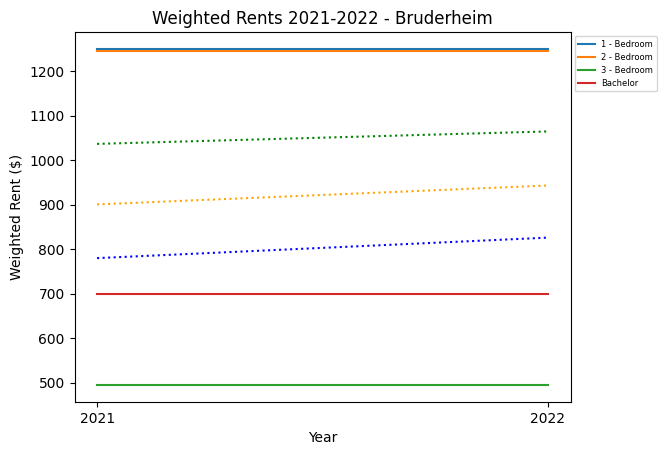

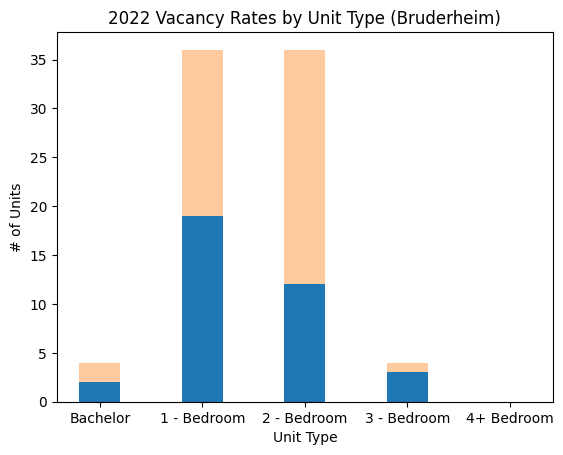

In [15]:
# Extreme Case 1: Bruderheim (Literally exactly the same rent between both for all units --> massive difference from rent prices)
for i in range(len(bruderheim.index)):
    plt.plot(["2021", "2022"], bruderheim_rents.iloc[i], label=bruderheim["Unit Type"].iloc[i])

plt.plot([mean_1beds2021, mean_1beds2022], linestyle='dotted', color="b")
plt.plot([mean_2beds2021, mean_2beds2022], linestyle='dotted', color="orange")
plt.plot([mean_3beds2021, mean_3beds2022], linestyle='dotted', color="g")
plt.title("Weighted Rents 2021-2022 - Bruderheim") 
plt.xlabel("Year")
plt.ylabel("Weighted Rent ($)")
plt.legend(prop={'size': 6}, bbox_to_anchor=(1,1))
plt.show()

# asdf
vacancy = np.array(bruderheim_vacancies.loc["Vacancies"])
num_units = np.array(bruderheim_vacancies.loc["Number of Units"])

plt.bar(bruderheim_vacancies.columns, vacancy, 0.4)
plt.bar(bruderheim_vacancies.columns, num_units - vacancy, 0.4, bottom=vacancy, alpha=0.4)
plt.title("2022 Vacancy Rates by Unit Type (Bruderheim)")
plt.xlabel("Unit Type")
plt.ylabel("# of Units")
plt.show()

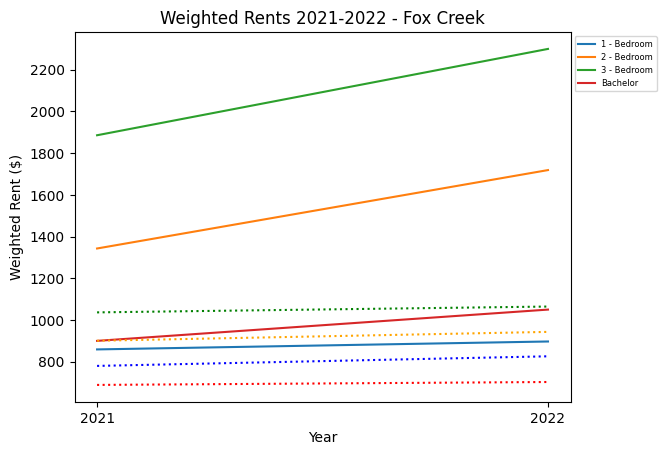

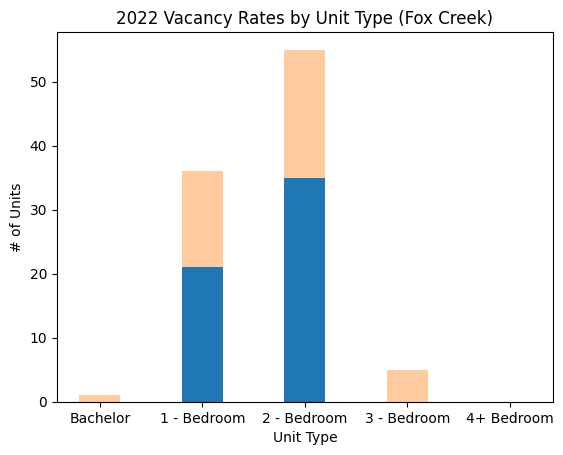

In [16]:
# Extreme Case 2: Fox Creek (Increases in all and are above the mean rent --> massive difference from rent prices)
for i in range(len(foxcreek.index)):
    plt.plot(["2021", "2022"], foxcreek_rents.iloc[i], label=foxcreek["Unit Type"].iloc[i])

plt.plot([mean_bachelors2021, mean_bachelors2022], linestyle='dotted', color="r")
plt.plot([mean_1beds2021, mean_1beds2022], linestyle='dotted', color="b")
plt.plot([mean_2beds2021, mean_2beds2022], linestyle='dotted', color="orange")
plt.plot([mean_3beds2021, mean_3beds2022], linestyle='dotted', color="g")
plt.title("Weighted Rents 2021-2022 - Fox Creek") 
plt.xlabel("Year")
plt.ylabel("Weighted Rent ($)")
plt.legend(prop={'size': 6}, bbox_to_anchor=(1,1))
plt.show()

# Bar Graph of vacancy by individual unit type
vacancy = np.array(foxcreek_vacancies.loc["Vacancies"])
num_units = np.array(foxcreek_vacancies.loc["Number of Units"])

plt.bar(foxcreek_vacancies.columns, vacancy, 0.4)
plt.bar(foxcreek_vacancies.columns, num_units - vacancy, 0.4, bottom=vacancy, alpha=0.4)
plt.title("2022 Vacancy Rates by Unit Type (Fox Creek)")
plt.xlabel("Unit Type")
plt.ylabel("# of Units")
plt.show()

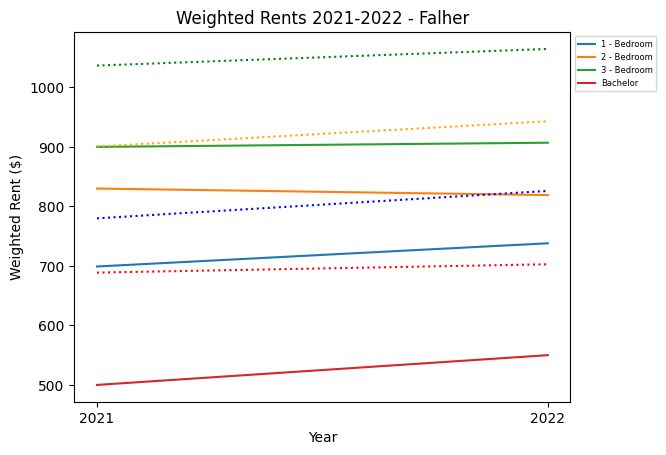

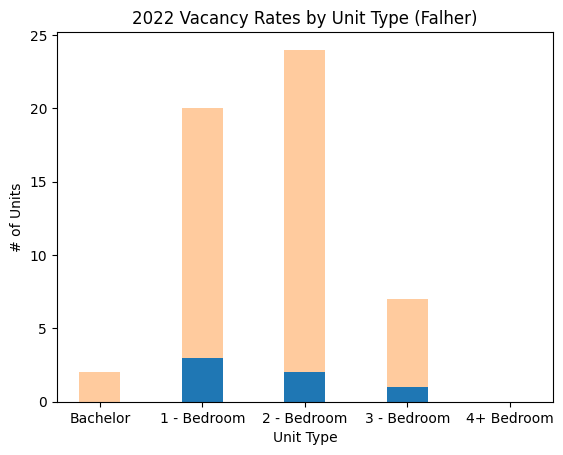

In [17]:
# Below the Average Rent for all --> Relatively Stable??
for i in range(len(falher.index)):
    plt.plot(["2021", "2022"], falher_rents.iloc[i], label=falher["Unit Type"].iloc[i])

plt.plot([mean_bachelors2021, mean_bachelors2022], linestyle='dotted', color="r")
plt.plot([mean_1beds2021, mean_1beds2022], linestyle='dotted', color="b")
plt.plot([mean_2beds2021, mean_2beds2022], linestyle='dotted', color="orange")
plt.plot([mean_3beds2021, mean_3beds2022], linestyle='dotted', color="g")
plt.title("Weighted Rents 2021-2022 - Falher") 
plt.xlabel("Year")
plt.ylabel("Weighted Rent ($)")
plt.legend(prop={'size': 6}, bbox_to_anchor=(1,1))
plt.show()

# Bar Graph of vacancy by individual unit type
vacancy = np.array(falher_vacancies.loc["Vacancies"])
num_units = np.array(falher_vacancies.loc["Number of Units"])

plt.bar(falher_vacancies.columns, vacancy, 0.4)
plt.bar(falher_vacancies.columns, num_units - vacancy, 0.4, bottom=vacancy, alpha=0.4)
plt.title("2022 Vacancy Rates by Unit Type (Falher)")
plt.xlabel("Unit Type")
plt.ylabel("# of Units")
plt.show()

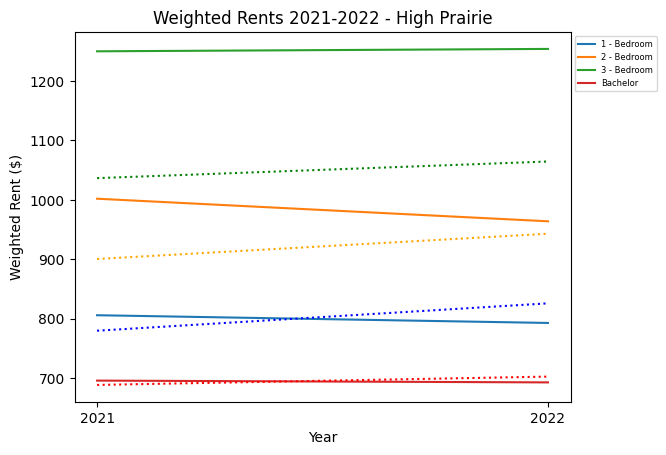

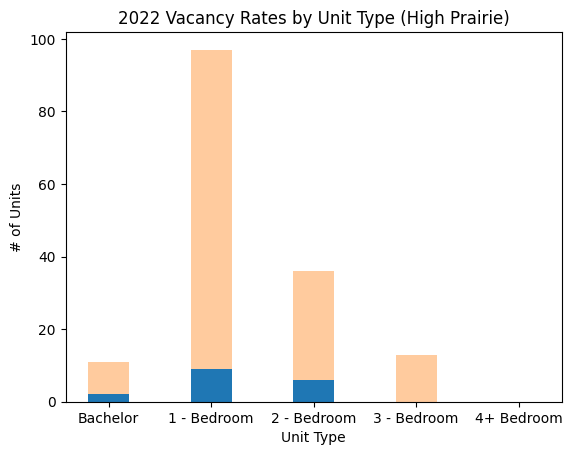

In [18]:
# most are below average --> decreaseing except for 3-bed, which is high and is stable
for i in range(len(highprairie.index)):
    plt.plot(["2021", "2022"], highprairie_rents.iloc[i], label=highprairie["Unit Type"].iloc[i])

plt.plot([mean_bachelors2021, mean_bachelors2022], linestyle='dotted', color="r")
plt.plot([mean_1beds2021, mean_1beds2022], linestyle='dotted', color="b")
plt.plot([mean_2beds2021, mean_2beds2022], linestyle='dotted', color="orange")
plt.plot([mean_3beds2021, mean_3beds2022], linestyle='dotted', color="g")
plt.title("Weighted Rents 2021-2022 - High Prairie") 
plt.xlabel("Year")
plt.ylabel("Weighted Rent ($)")
plt.legend(prop={'size': 6}, bbox_to_anchor=(1,1))
plt.show()

# Bar Graph of vacancy by individual unit type
vacancy = np.array(highprairie_vacancies.loc["Vacancies"])
num_units = np.array(highprairie_vacancies.loc["Number of Units"])

plt.bar(highprairie_vacancies.columns, vacancy, 0.4)
plt.bar(highprairie_vacancies.columns, num_units - vacancy, 0.4, bottom=vacancy, alpha=0.4)
plt.title("2022 Vacancy Rates by Unit Type (High Prairie)")
plt.xlabel("Unit Type")
plt.ylabel("# of Units")
plt.show()

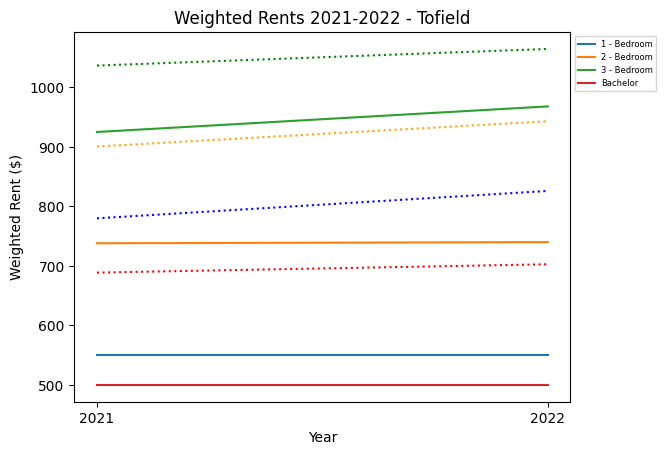

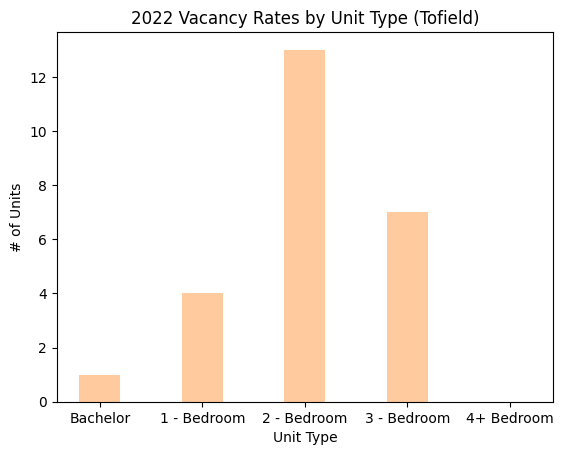

In [19]:
for i in range(len(tofield.index)):
    plt.plot(["2021", "2022"], tofield_rents.iloc[i], label=tofield["Unit Type"].iloc[i])

plt.plot([mean_bachelors2021, mean_bachelors2022], linestyle='dotted', color="r")
plt.plot([mean_1beds2021, mean_1beds2022], linestyle='dotted', color="b")
plt.plot([mean_2beds2021, mean_2beds2022], linestyle='dotted', color="orange")
plt.plot([mean_3beds2021, mean_3beds2022], linestyle='dotted', color="g")
plt.title("Weighted Rents 2021-2022 - Tofield") 
plt.xlabel("Year")
plt.ylabel("Weighted Rent ($)")
plt.legend(prop={'size': 6}, bbox_to_anchor=(1,1))
plt.show()

# Bar Graph of vacancy by individual unit type
vacancy = np.array(tofield_vacancies.loc["Vacancies"])
num_units = np.array(tofield_vacancies.loc["Number of Units"])

plt.bar(tofield_vacancies.columns, vacancy, 0.4)
plt.bar(tofield_vacancies.columns, num_units - vacancy, 0.4, bottom=vacancy, alpha=0.4)
plt.title("2022 Vacancy Rates by Unit Type (Tofield)")
plt.xlabel("Unit Type")
plt.ylabel("# of Units")
plt.show()

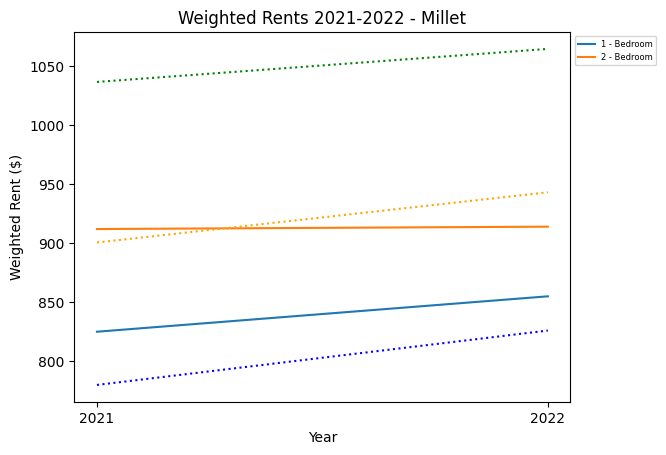

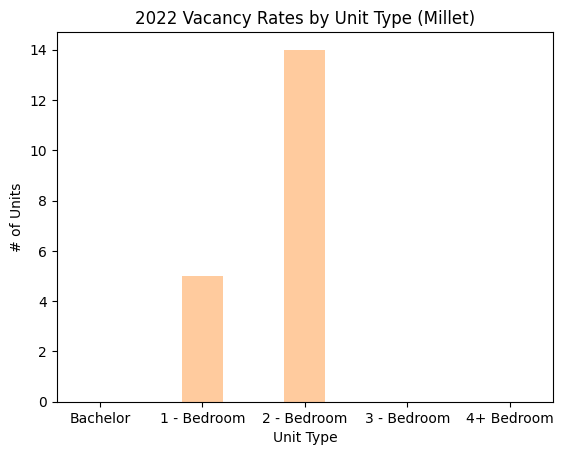

In [29]:
# Less housing units 1
for i in range(len(millet.index)):
    plt.plot(["2021", "2022"], millet_rents.iloc[i], label=millet["Unit Type"].iloc[i])

plt.plot([mean_1beds2021, mean_1beds2022], linestyle='dotted', color="b")
plt.plot([mean_2beds2021, mean_2beds2022], linestyle='dotted', color="orange")
plt.plot([mean_3beds2021, mean_3beds2022], linestyle='dotted', color="g")
plt.title("Weighted Rents 2021-2022 - Millet") 
plt.xlabel("Year")
plt.ylabel("Weighted Rent ($)")
plt.legend(prop={'size': 6}, bbox_to_anchor=(1,1))
plt.show()

# Bar Graph of vacancy by individual unit type
vacancy = np.array(millet_vacancies.loc["Vacancies"])
num_units = np.array(millet_vacancies.loc["Number of Units"])

plt.bar(millet_vacancies.columns, vacancy, 0.4)
plt.bar(millet_vacancies.columns, num_units - vacancy, 0.4, bottom=vacancy, alpha=0.4)
plt.title("2022 Vacancy Rates by Unit Type (Millet)")
plt.xlabel("Unit Type")
plt.ylabel("# of Units")
plt.show()

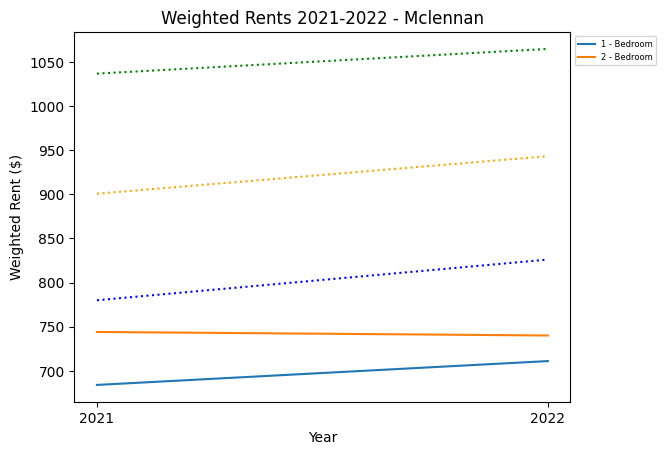

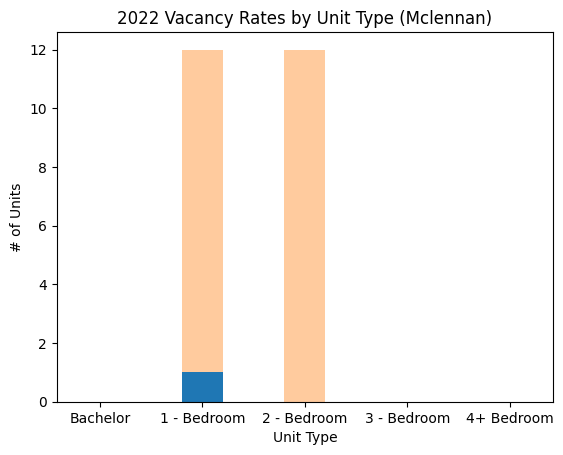

In [30]:
# Less housing units 2
for i in range(len(mclennan.index)):
    plt.plot(["2021", "2022"], mclennan_rents.iloc[i], label=mclennan["Unit Type"].iloc[i])

plt.plot([mean_1beds2021, mean_1beds2022], linestyle='dotted', color="b")
plt.plot([mean_2beds2021, mean_2beds2022], linestyle='dotted', color="orange")
plt.plot([mean_3beds2021, mean_3beds2022], linestyle='dotted', color="g")
plt.title("Weighted Rents 2021-2022 - Mclennan") 
plt.xlabel("Year")
plt.ylabel("Weighted Rent ($)")
plt.legend(prop={'size': 6}, bbox_to_anchor=(1,1))
plt.show()

# Bar Graph of vacancy by individual unit type
vacancy = np.array(mclennan_vacancies.loc["Vacancies"])
num_units = np.array(mclennan_vacancies.loc["Number of Units"])

plt.bar(mclennan_vacancies.columns, vacancy, 0.4)
plt.bar(mclennan_vacancies.columns, num_units - vacancy, 0.4, bottom=vacancy, alpha=0.4)
plt.title("2022 Vacancy Rates by Unit Type (Mclennan)")
plt.xlabel("Unit Type")
plt.ylabel("# of Units")
plt.show()

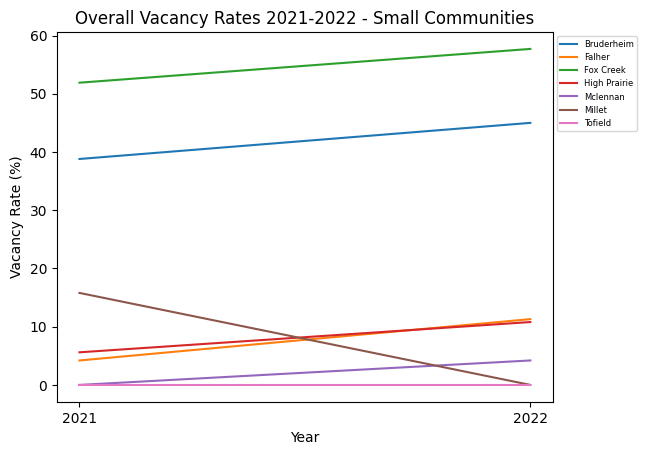

In [22]:
# small town vacancies
vacancy_smalltowns_num = vacancy_smalltowns[["2021 Vacancy", "2022 Vacancy"]]
for i in range(len(vacancy_smalltowns.index)):
    plt.plot(["2021", "2022"], vacancy_smalltowns_num.iloc[i], label=vacancy_smalltowns["Community"].iloc[i])

plt.title("Overall Vacancy Rates 2021-2022 - Small Communities") 
plt.xlabel("Year")
plt.ylabel("Vacancy Rate (%)")
plt.legend(prop={'size': 6}, bbox_to_anchor=(1,1))
plt.show()

- When most are Below Average --> Overall Smaller Vacancy Rates (High Prairie, Falher)
- When most are Above Average --> Overall larger Vacancy Rates (Bruderheim, Fox Creek)
- Increase in Vacancy Rates between the two years overall for the aforementioned cases
- Overall relatively more drastic patterns I think (we will see later)

<u>Note</u>:
- Main idea with small towns is smaller rents usually due to smaller populations, so might this affect vacancy rates?
- Usually less housing types or smaller rents noticed compared to average, keep note of this
- Falher and Tofield might be interesting since both have similar trends but Falher has more decrease
- Even if nothing remarkable comes of this, still remark it

<br>

- Noticed that cases with massive diffence from average will usually have high vacancy rates and increase in it, regradless of town size

---------------------------------

In [23]:
# list of medium towns (size 2493-5760)
med_towns = table9_cleaned[table9_cleaned["2022"].between(population_bins[1], population_bins[2], inclusive='right')]
med_towns

,Area Name,Type,2022
308,Athabasca,T,2827
296,Barrhead,T,4503
85,Black Diamond,T,2825
29,Cardston,T,3828
96,Carstairs,T,5181
38,Claresholm,T,3957
98,Didsbury,T,5172
425,Fairview,T,2914
36,Fort Macleod,T,3499
402,Grande Cache,T,3276


In [24]:
# list of large towns (size 5760-14996)
big_towns = table9_cleaned[table9_cleaned["2022"].between(population_bins[2], population_bins[3], inclusive='right')]
big_towns

,Area Name,Type,2022
330,Banff,T,9347
150,Blackfalds,T,11363
256,Bonnyville,T,6632
18,Coaldale,T,9179
322,Crowsnest Pass,SM,5910
226,Drayton Valley,T,7482
68,Drumheller,T,8231
320,Edson,T,8399
81,High River,T,14996
319,Hinton,T,9933
